In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# define train and test file
# reading file
df_train = pd.read_csv('/Users/jiafangliu/Documents/class/NLP/Final/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('/Users/jiafangliu/Documents/class/NLP/Final/test.csv', encoding="ISO-8859-1")

In [3]:
df_desc = pd.read_csv('/Users/jiafangliu/Documents/class/NLP/Final/product_descriptions.csv')

In [4]:
# combine all the data to make it easier text mining
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

df_all = pd.merge(df_all, df_desc, how='left', on='product_uid')
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ..."
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ..."
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...


In [5]:
# text mining
stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

def str_lemmanize(s):
    return " ".join([wordnet_lemmatizer.lemmatize(word) for word in s.lower().split()])

def str_rm_stopwords(s):
    return " ".join([word for word in s.lower().split()if word not in stopwords.words('english')])

def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [6]:
df_all['search_term'] = df_all['search_term'].map(lambda x:str_stemmer(x))
df_all['search_term'] = df_all['search_term'].map(lambda x:str_lemmanize(x))
df_all['search_term'] = df_all['search_term'].map(lambda x:str_rm_stopwords(x))

In [7]:
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stemmer(x))
df_all['product_title'] = df_all['product_title'].map(lambda x:str_lemmanize(x))
df_all['product_title'] = df_all['product_title'].map(lambda x:str_rm_stopwords(x))

In [8]:
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stemmer(x))
df_all['product_description'] = df_all['product_description'].map(lambda x:str_lemmanize(x))
df_all['product_description'] = df_all['product_description'].map(lambda x:str_rm_stopwords(x))

In [9]:
#Step3 set text features
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

# length of key words
df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)

# how many common words between search term and product title
df_all['commons_in_title'] = df_all.apply(lambda x : str_common_word(x['search_term'],x['product_title']), axis = 1)
# df_all.drop('length_of_query', axis=1, inplace=True)

# how many common words between serach term and discription 
df_all['commons_in_desc'] = df_all.apply(lambda x : str_common_word(x['search_term'], x['product_description']), axis = 1)



# 
# # Levenshtein
import Levenshtein
df_all['dist_in_title'] = df_all.apply(lambda x:Levenshtein.ratio(x['search_term'].encode('utf-8'),x['product_title'].encode('utf-8')), axis=1)
df_all['dist_in_desc'] = df_all.apply(lambda x:Levenshtein.ratio(x['search_term'].encode('utf-8'),x['product_description'].encode('utf-8')), axis=1)


# TF-IDF


df_all['all_texts'] = df_all['product_title'] + ' . ' + df_all['product_description'] + ' . '

# from gensim.similarities import MatrixSimilarity


def to_tfidf(text):
    res = tfidf[dictionary.doc2bow(list(tokenize(text, errors='ignore')))]
    return res
# 

def cos_sim(text1, text2):
    tfidf1 = to_tfidf(text1)
    tfidf2 = to_tfidf(text2)
    index = MatrixSimilarity([tfidf1],num_features=len(dictionary))
    sim = index[tfidf2]
    
    return float(sim[0])

df_all['tfidf_cos_sim_in_title'] = df_all.apply(lambda x: cos_sim(x['search_term'], x['product_title']), axis=1)
df_all['tfidf_cos_sim_in_desc'] = df_all.apply(lambda x: cos_sim(x['search_term'], x['product_description']), axis=1)

In [10]:
# drop 
df_all = df_all.drop(['search_term','product_title','product_description'], axis = 1)
df_all.head()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
0,2,100001,3.00,2,0,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,0,2
3,16,100005,2.33,3,0,0
4,17,100005,2.67,3,0,1


In [11]:
# step4 reconstruct training dataset
# divide training data and test data set
df_train = df_all.loc[df_train.index]
df_test = df_all.loc[df_test.index]

In [12]:
test_ids = df_test['id']
y_train = df_train['relevance'].values

In [13]:
X_train = df_train.drop(['id', 'relevance'], axis = 1).values
X_test = df_test.drop(['id', 'relevance'], axis = 1).values


In [14]:
# construct model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [113]:
params = [.1, .3, .5, .7, .9, .99,1,3,5,6,7,8,9,10]
test_scores = []
for param in params:
    clf = RandomForestRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

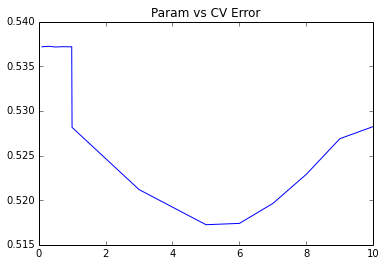

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("Param vs CV Error");

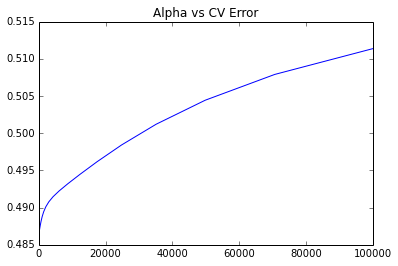

In [91]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-10, 5, 100)
test_scores1 = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score1 = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores1.append(np.mean(test_score1))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores1)
plt.title("Alpha vs CV Error")

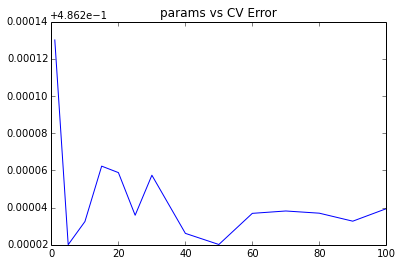

In [92]:
# bagging
from sklearn.linear_model import Ridge
ridge = Ridge(0)

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
params = [1, 5, 10, 15, 20, 25, 30, 40,50,60,70,80,90,100]
test_scores2 = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score2 = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores2.append(np.mean(test_score2))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores2)
plt.title("params vs CV Error")


In [56]:
print test_scores2

[0.52408631885115697, 0.52384761165623384, 0.52370159677394401, 0.52382132100273071, 0.52376745138260783, 0.5237797047468683, 0.52378379234997752, 0.52378553102161352, 0.52377868391308824, 0.52376289341597093, 0.52374995892273912, 0.52376967378815575, 0.52376602358460378, 0.52378038995975185]


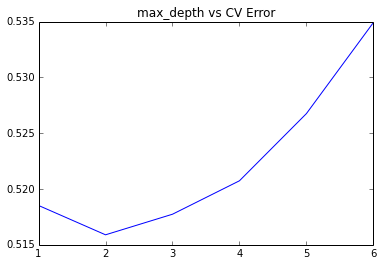

In [19]:
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error")

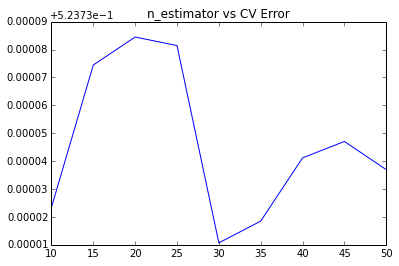

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge(5)
from sklearn.ensemble import AdaBoostRegressor
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

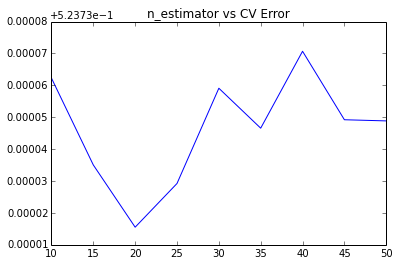

In [61]:
from sklearn.ensemble import AdaBoostRegressor
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");